In [21]:
#Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [22]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
#Knowing the features and target variable of the dataset
print(type(boston_dataset))
print(boston_dataset.keys())
print(boston_dataset.DESCR)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to

In [23]:
#Loading into a dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.shape
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
#Adding the target column to the dataframe
boston['MEDV'] = boston_dataset.target
boston.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
#Checking for any null values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

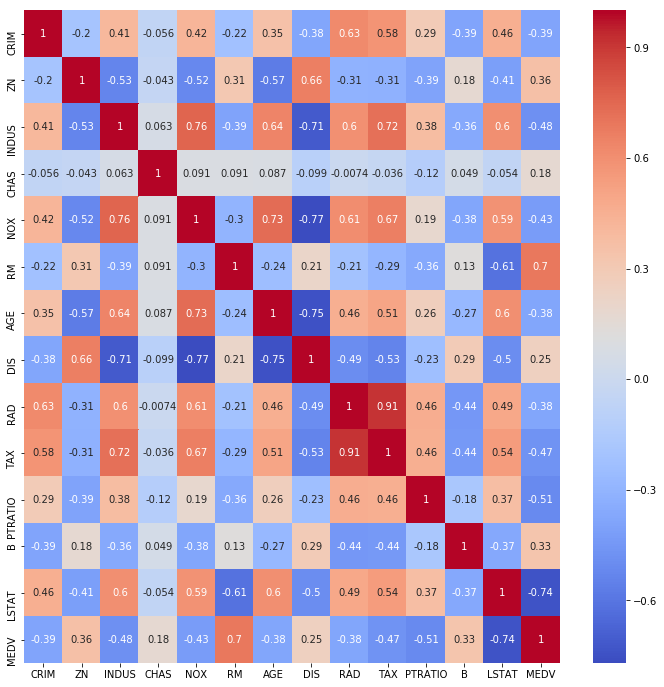

In [26]:
#Plotting the correlation b/w different variables
corr=boston.corr()
plt.rcParams["figure.figsize"] = (12,12)
sns.heatmap(corr, cmap = "coolwarm", annot = True)

In [27]:
#concatenate the LSTAT and RM columns
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']
print(X.shape);print(Y.shape)

(506, 2)
(506,)


In [28]:
#Splitting into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [29]:
#Training the model
lrmodel= make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
lrmodel.fit(X_train, Y_train)
y_pred = lrmodel.predict(X_train)
# model evaluation for testing set
y_pred = lrmodel.predict(X_test)
print(y_pred)
print("\n")
rmse = (np.sqrt(mean_squared_error(Y_test, y_pred)))
#cv_result=cross_val_score(lrmodel,X,Y,cv=5)
#print(cv_result)
print("\n")
print("The model performance for testing set")
print('RMSE is {}'.format(rmse))
print("\n")
print(r2_score(Y_test, y_pred))

[44.47982942 30.20479695 24.63103207 12.34294101 35.94260944 11.99843717
 31.38007106 26.99833908 24.66510697 19.42728515 34.06801936 22.16717945
 21.92865007 31.6883393  26.33094674 19.5015096  14.35567526 18.56798799
 14.06245913 21.29449506 12.01263698 22.18521494 45.47301971 22.95154882
 29.4941805  12.02320314 26.42944904 20.69145381 27.38277033 29.00141756
 11.16667255 12.70897708 16.70486059 21.29628922 25.1340603  20.96208436
 24.89266543 11.65371454 44.22927885 36.36246643 18.08175278 11.63421905
 26.89251292 14.91679494 26.7510358  30.14753953 15.31395432 15.65060898
 18.80108688 11.62859672 18.82046641 19.79892699 23.945504   14.08215395
 16.97211474 27.62376403 41.46995033 16.42255532 28.7056425  19.00127024
 18.42148684 21.9410404  16.03592574 32.42953743 21.04215751 14.81616809
 21.05917805 25.11060986 21.97699174 20.50543057 15.8724561  26.18755259
 16.67189487 15.93972793 19.4929677  31.0607175  18.10028469 13.57924904
 27.08593932 17.32429123 20.11651619 48.06684108 13